<a href="https://colab.research.google.com/github/suulee/Machine-learning/blob/master/assignment02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment02**
Name: Lee Suyoung


Student ID: 20164111

In [0]:
!pip install tensorflow==1.12.0
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## **1. Set variables**

In [0]:
num=100 
std =5 

def fun(x):
    f=3*x+2
    return f

n = np.random.rand(num)
nn = n - np.mean(n)
xData = np.linspace(-10,10,num)
Y_func = fun(xData)
yData = Y_func + nn * std

W=tf.Variable(tf.random_normal([1],name='weight'))
b=tf.Variable(tf.random_normal([1],name='bias'))
X=tf.placeholder(tf.float32)
Y=tf.placeholder(tf.float32)

## hypothesis XW+b
H= X*W+b

## **2. Cost function and Gradient Descent**

In [0]:
##cost/loss function
cost=0.5*tf.reduce_mean(tf.square(H-Y))

##minimize
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01)
train=optimizer.minimize(cost)


## **3. Fit the data**

In [0]:
##launch the graph in a session
sess=tf.Session()

##initializes the graph in a session
sess.run(tf.global_variables_initializer())

#fit the line with new trainig data
for step in range(3001):
    sess.run(train,feed_dict={X:xData, Y:yData})

## **4. Plotting the results**

4.1. input data

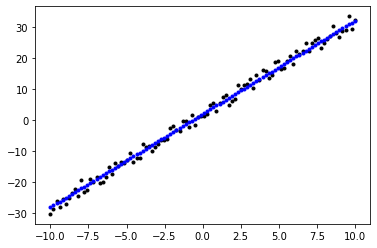

In [5]:
plt.plot(xData,yData,'k.',xData,Y_func,'b.')

4.2. output results

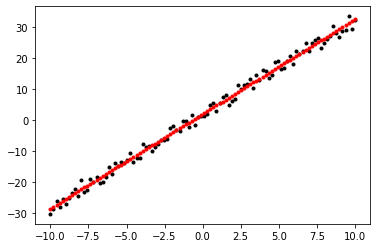

In [6]:
def fun_H(x):
    f=sess.run(W)*x+sess.run(b)
    return f
Y_plot=fun_H(xData)

plt.plot(xData,yData,'k.',xData,Y_plot,'r.')

4.3. Energy values


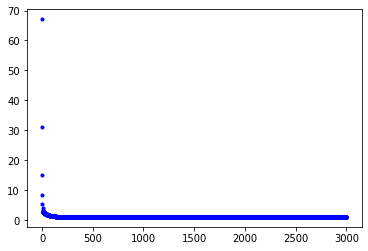

In [7]:
sess.run(tf.global_variables_initializer())

for step in range(3001):
    sess.run(train,feed_dict={X:xData, Y:yData})
    plt.plot(step,sess.run(cost,feed_dict={X:xData, Y:yData}),'b.')